# Apriori

In [1]:
dataset = [['Jupe', 'Baskets', 'Écharpe', 'Pantalon', 'Chapeau'],

    ['Lunettes de soleil', 'Jupe', 'Baskets', 'Pantalon', 'Chapeau'],

    ['Robe', 'Sandales', 'Écharpe', 'Pantalon', 'Talons'],

    ['Robe', 'Collier', 'Boucles d-oreilles', 'Écharpe', 'Chapeau', 'Talons', 'Chapeau'],

   ['Boucles d-oreilles', 'Jupe', 'Jupe', 'Écharpe', 'Chemise', 'Pantalon']]

In [2]:
import matplotlib.pyplot as plt
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset) 
df=pd.DataFrame(te_ary, columns=te.columns_)
df

,Baskets,Boucles d-oreilles,Chapeau,Chemise,Collier,Jupe,Lunettes de soleil,Pantalon,Robe,Sandales,Talons,Écharpe
0,True,False,True,False,False,True,False,True,False,False,False,True
1,True,False,True,False,False,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,True,True
3,False,True,True,False,True,False,False,False,True,False,True,True
4,False,True,False,True,False,True,False,True,False,False,False,True


<function matplotlib.pyplot.show(close=None, block=None)>

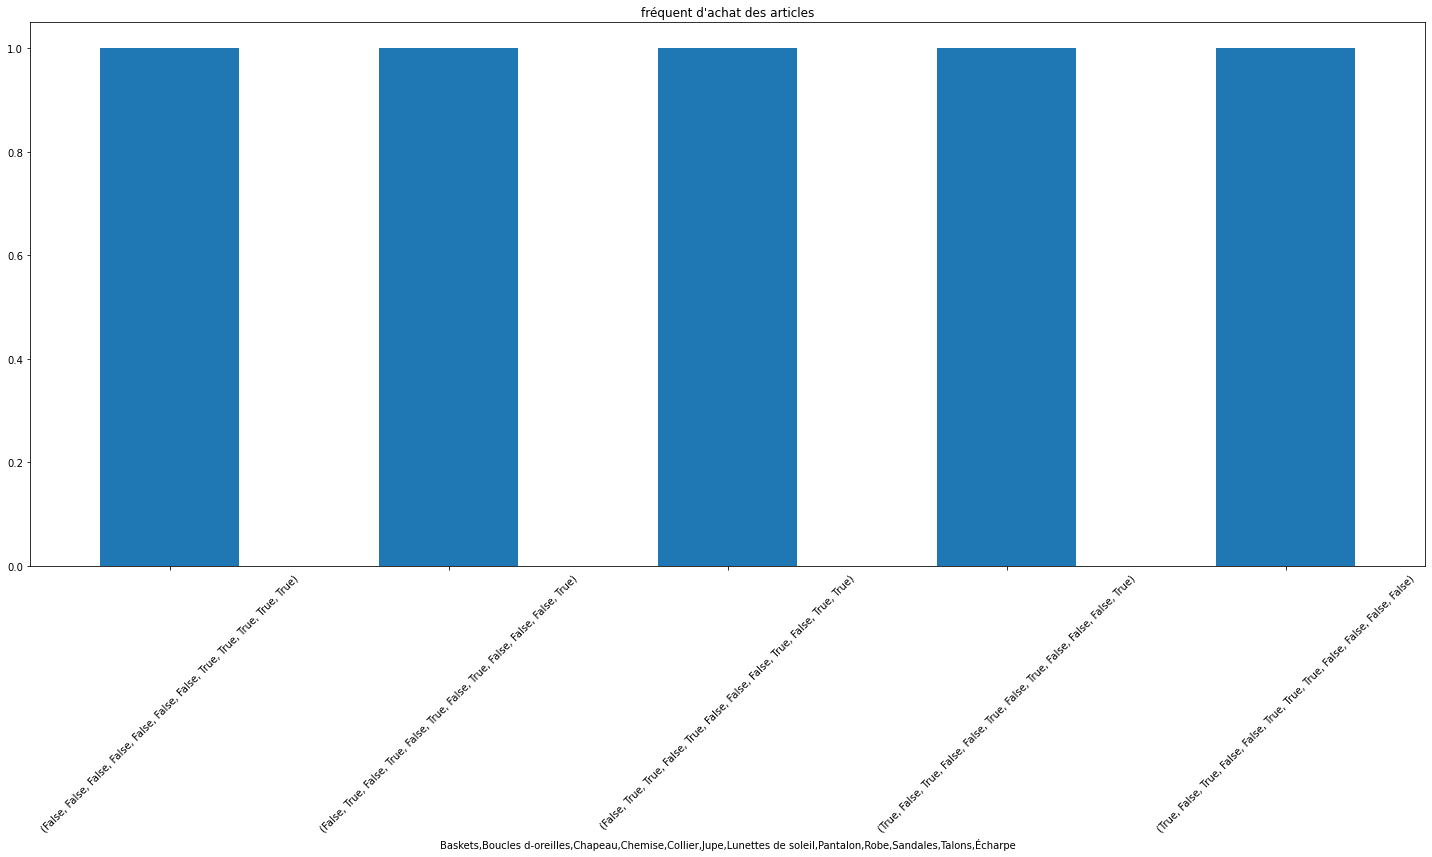

In [3]:
#visualisation
plt.figure(figsize=(25,10))
graph= df.value_counts()
graph.plot.bar()
plt.xticks(rotation=45)
plt.title("fréquent d'achat des articles")
plt.show

In [4]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Chapeau)
1,0.6,(Jupe)
2,0.8,(Pantalon)
3,0.8,(Écharpe)
4,0.6,"(Pantalon, Jupe)"
5,0.6,"(Pantalon, Écharpe)"


# Association Rule Mining¶

In [5]:
from mlxtend.frequent_patterns import association_rules 
res=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pantalon),(Jupe),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
1,(Jupe),(Pantalon),0.6,0.8,0.6,1.00,1.2500,0.12,inf
2,(Pantalon),(Écharpe),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
3,(Écharpe),(Pantalon),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8


In [6]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Jupe),(Pantalon),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [7]:
res1=res[['antecedents','consequents','support','confidence','lift']]
res1

,antecedents,consequents,support,confidence,lift
0,(Pantalon),(Jupe),0.6,0.75,1.2500
1,(Jupe),(Pantalon),0.6,1.00,1.2500
2,(Pantalon),(Écharpe),0.6,0.75,0.9375
3,(Écharpe),(Pantalon),0.6,0.75,0.9375


In [28]:
df1=pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [31]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 586.1+ KB


In [32]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df1, min_support=0.6)
frequent_itemsets

ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value shrimp

In [12]:
df.values.tolist()

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['chutney',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['turkey',
  'avocado',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['low fat yogurt',
  nan,
  n

In [13]:
T=[]
for i in range(len(df1)):
    T.append([str(df1.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='nan']) 

In [14]:
T

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [15]:
from apyori import apriori

In [16]:
rules=apriori(T, min_support=0.003, min_confidence=0.50,min_lift=3, min_left=2)

In [17]:
list(rules)

[RelationRecord(items=frozenset({'cereals', 'ground beef', 'spaghetti'}), support=0.0030662578322890282, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cereals', 'ground beef'}), items_add=frozenset({'spaghetti'}), confidence=0.6764705882352942, lift=3.8853031258445188)]),
 RelationRecord(items=frozenset({'chicken', 'milk', 'olive oil'}), support=0.0035995200639914677, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken', 'olive oil'}), items_add=frozenset({'milk'}), confidence=0.5, lift=3.858539094650206)]),
 RelationRecord(items=frozenset({'cooking oil', 'spaghetti', 'ground beef'}), support=0.004799360085321957, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cooking oil', 'ground beef'}), items_add=frozenset({'spaghetti'}), confidence=0.5714285714285714, lift=3.2819951870487856)]),
 RelationRecord(items=frozenset({'spaghetti', 'red wine', 'eggs'}), support=0.0037328356219170776, ordered_statistics=[OrderedStatistic(items_base=frozenset({'red

# check max sold items

In [18]:
D=df1.values.ravel()
D

array(['shrimp', 'almonds', 'avocado', ..., nan, nan, nan], dtype=object)

In [19]:
import collections
Val=collections.Counter(D)
Val

Counter({'shrimp': 536,
         'almonds': 153,
         'avocado': 250,
         'vegetables mix': 193,
         'green grapes': 68,
         'whole weat flour': 70,
         'yams': 86,
         'cottage cheese': 239,
         'energy drink': 200,
         'tomato juice': 228,
         'low fat yogurt': 574,
         'green tea': 991,
         'honey': 356,
         'salad': 37,
         'mineral water': 1788,
         'salmon': 319,
         'antioxydant juice': 67,
         'frozen smoothie': 475,
         'spinach': 53,
         'olive oil': 494,
         'burgers': 654,
         'meatballs': 157,
         'eggs': 1348,
         nan: 120657,
         'chutney': 31,
         'turkey': 469,
         'milk': 972,
         'energy bar': 203,
         'whole wheat rice': 439,
         'whole wheat pasta': 221,
         'french fries': 1282,
         'soup': 379,
         'light cream': 117,
         'shallot': 58,
         'frozen vegetables': 715,
         'spaghetti': 1306,
        

In [20]:
Val.items()

dict_items([('shrimp', 536), ('almonds', 153), ('avocado', 250), ('vegetables mix', 193), ('green grapes', 68), ('whole weat flour', 70), ('yams', 86), ('cottage cheese', 239), ('energy drink', 200), ('tomato juice', 228), ('low fat yogurt', 574), ('green tea', 991), ('honey', 356), ('salad', 37), ('mineral water', 1788), ('salmon', 319), ('antioxydant juice', 67), ('frozen smoothie', 475), ('spinach', 53), ('olive oil', 494), ('burgers', 654), ('meatballs', 157), ('eggs', 1348), (nan, 120657), ('chutney', 31), ('turkey', 469), ('milk', 972), ('energy bar', 203), ('whole wheat rice', 439), ('whole wheat pasta', 221), ('french fries', 1282), ('soup', 379), ('light cream', 117), ('shallot', 58), ('frozen vegetables', 715), ('spaghetti', 1306), ('pet food', 49), ('cookies', 603), ('cooking oil', 383), ('champagne', 351), ('chocolate', 1230), ('chicken', 450), ('oil', 173), ('fresh tuna', 167), ('tomatoes', 513), ('black tea', 107), ('extra dark chocolate', 90), ('protein bar', 139), ('red

In [21]:
df2=pd.DataFrame(Val.items())
df2

,0,1
0,shrimp,536
1,almonds,153
2,avocado,250
3,vegetables mix,193
4,green grapes,68
...,...,...
116,burger sauce,44
117,oatmeal,33
118,asparagus,1
119,cream,7


In [22]:
df2=df2.rename(columns={0:'Items', 1:'Total'})
df2

,Items,Total
0,shrimp,536
1,almonds,153
2,avocado,250
3,vegetables mix,193
4,green grapes,68
...,...,...
116,burger sauce,44
117,oatmeal,33
118,asparagus,1
119,cream,7


In [23]:
df2.sort_values(by='Total',ascending=False)[1:]

,Items,Total
14,mineral water,1788
22,eggs,1348
35,spaghetti,1306
30,french fries,1282
40,chocolate,1230
...,...,...
115,bramble,14
119,cream,7
120,napkins,5
98,water spray,3


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

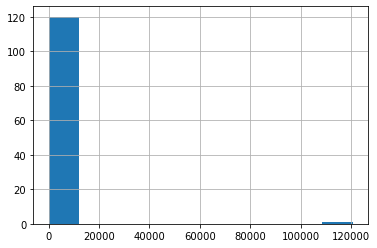

In [25]:
df2['Total'].hist()

<AxesSubplot:xlabel='Total', ylabel='Items'>

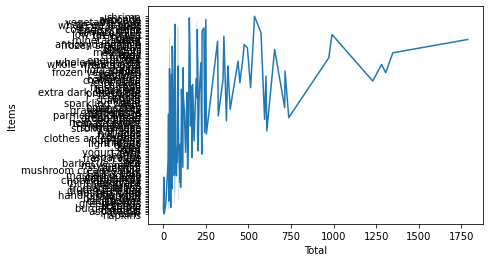

In [26]:
sns.lineplot(x='Total',y='Items',data=df2)

<function matplotlib.pyplot.show(close=None, block=None)>

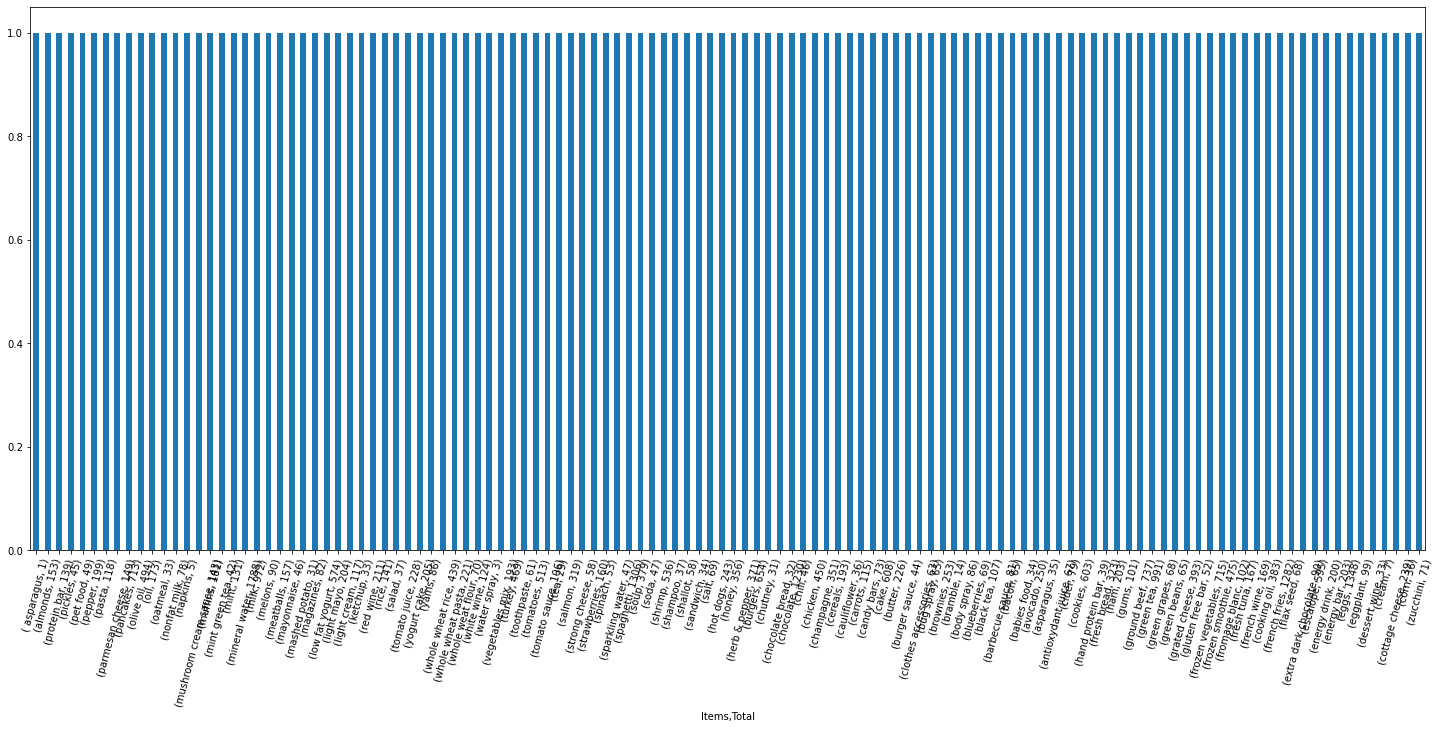

In [27]:
plt.figure(figsize=(25,10))
graph1= df2.value_counts()
graph1.plot.bar()
plt.xticks(rotation=75)
plt.show